# Objectives
YW
* scrape a website for relevant information, store that information to a dataframe and save that dataframe as a csv file
* load in a dataframe and do the following
    * calculate the zscores of a given column
    * calculate the zscores of a point from a given column in the dataframe
    * calculate and plot the pmf and cdf of another column

# Part 1 - Webscraping
* use the following url scrape the first page of results
* for each item get the name of the item
* store the names to a dataframe and save that dataframe to csv then display
    * store the dataframe in the `data` folder in the repo
    * name the file `part1.csv` and make sure that when you write it you set `index=False`
* the head of the dataframe

* it should match the following
<img src="solutions/images/part1.png"/>

In [1]:
# scrape the data
import json
import requests

import pandas as pd
from bs4 import BeautifulSoup
from pymongo import MongoClient

In [2]:
url = "https://www.petsmart.com/dog/treats/dental-treats/#page_name=flyout&category=dog&cta=dentaltreat"

In [3]:
r=requests.get(url=url)
r.status_code

200

In [4]:
r.content[:3000]

b'\n<!doctype html>\n<!--[if lt IE 7]> <html class="ie6 oldie" lang="en"> <![endif]-->\n<!--[if IE 7]> <html class="ie7 oldie" lang="en"> <![endif]-->\n<!--[if IE 8]> <html class="ie8 oldie" lang="en"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en"> <!--<![endif]-->\n<head>\n<script>\ndataLayer =\n[{\n\'language\': \'en\',\n\'loginState\': false,\n\'pageName\':\'ps:\'productgridutils.getfirstparentname(pdict.productsearchresult.category):productgridutils.getsecondparentname(pdict.productsearchresult.category):dental-treats\',\n\'section\': \'productgridutils.getsecondparentname(pdict.productsearchresult.category)\',\n\'subSection\': \'productgridutils.getfirstparentname(pdict.productsearchresult.category)\',\n\n\n\n}];\n</script>\n\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\'//www.googletagmanager.co

In [5]:
webpage_soup = BeautifulSoup(r.content,'html.parser')

In [6]:
results_list = webpage_soup.find_all('div', attrs={'class': 'search-result-content'})
results = results_list[0]

In [7]:
result_boxes = results.find_all('li', attrs={'class': 'grid-tile col-md-4 col-sm-12'})
len(result_boxes)

36

In [8]:
first_box = result_boxes[0]
name = first_box.find('h3').text
name

'Greenies Regular Dental Dog Treats'

In [9]:
name_list = []
for box in result_boxes:
    name_list.append(box.find('h3').text)
name_list

['Greenies Regular Dental Dog Treats',
 'Greenies Petite Dental Dog Treats',
 'Greenies Large Dental Dog Treats',
 'Pedigree Dentastix Large Dog Treats',
 'Greenies 6 Month+ Puppy Petite Dental Dog Treats',
 'Greenies 6 Month+ Puppy Dental Dog Treats',
 'Greenies 6 Month+ Puppy Teenie Dental Dog Treats',
 'Greenies Teenie Dental Dog Treats',
 'Authority® Dental & DHA Stick Puppy Treats Parsley Mint - Gluten Free, Grain Free',
 'Pedigree Dentastix Large Dog Sticks',
 'Milk-Bone Brushing Chews Large Dental Dog Treats',
 'Pedigree Dentastix Triple Action Dental Dog Treats - Variety Pack',
 'Pedigree Dentastix Small/Medium Dog Sticks',
 'WHIMZEES Variety Value Box Dental Dog Treat - Natural, Grain Free',
 'Pedigree Dentastix Mini Dog Sticks',
 'Virbac® C.E.T.® VeggieDent® Tartar Control Dog Chews',
 'Milk-Bone Brushing Chews Dental Dog Treat',
 'Authority® Dental & DHA Rings Puppy Treats Parsley Mint - Gluten Free, Grain Free',
 'Pedigree Dentastix Large Dog Sticks',
 'Greenies Teenie Dog 

In [10]:
# load the data into a dataframe file
df = pd.DataFrame(name_list)
df

,0
0,Greenies Regular Dental Dog Treats
1,Greenies Petite Dental Dog Treats
2,Greenies Large Dental Dog Treats
3,Pedigree Dentastix Large Dog Treats
4,Greenies 6 Month+ Puppy Petite Dental Dog Treats
5,Greenies 6 Month+ Puppy Dental Dog Treats
6,Greenies 6 Month+ Puppy Teenie Dental Dog Treats
7,Greenies Teenie Dental Dog Treats
8,Authority® Dental & DHA Stick Puppy Treats Par...
9,Pedigree Dentastix Large Dog Sticks


In [11]:
# save the data as a csv file
df.to_csv("data/part1.csv",index=False)

In [12]:
# display df.head()
df.head()

,0
0,Greenies Regular Dental Dog Treats
1,Greenies Petite Dental Dog Treats
2,Greenies Large Dental Dog Treats
3,Pedigree Dentastix Large Dog Treats
4,Greenies 6 Month+ Puppy Petite Dental Dog Treats


# Part 2

load in the csv file located in the `data` folder called `part2.csv`

create a function that calculates the zscores of an array

then calculate the zscores for each column in part2.csv and add them as columns

See below for final result

<img src="solutions/images/part2_df_preview.png"/>

In [14]:
df2 = pd.read_csv('data/part2.csv')
df2

,salaries,NPS Score,eventOutcome
0,44112.0,-7.0,1
1,46777.0,-12.0,2
2,50013.0,50.0,5
3,48983.0,-13.0,0
4,50751.0,-11.0,6
...,...,...,...
4995,50580.0,62.0,7
4996,54526.0,10.0,1
4997,46135.0,-27.0,3
4998,47223.0,3.0,7


In [41]:
import numpy as np
import scipy.stats as scs
salaries_array=np.asarray(df2['salaries'])
NPS_array=np.asarray(df2['NPS Score'])
eventOutcome_array=np.asarray(df2['eventOutcome'])
salaries_array, NPS_array, eventOutcome_array

(array([44112., 46777., 50013., ..., 46135., 47223., 47913.]),
 array([ -7., -12.,  50., ..., -27.,   3.,   2.]),
 array([1, 2, 5, ..., 3, 7, 0], dtype=int64))

In [42]:
# calculate the zscore for each column and store them as a new column with the names used above
salaries_z = stats.zscore(salaries_array)
NPS_z = stats.zscore(NPS_array)
eo_z = stats.zscore(eventOutcome_array)
salaries_z, NPS_z, eo_z

(array([-1.46030067, -0.7940606 ,  0.01492733, ..., -0.95455821,
        -0.68256227, -0.51006484]),
 array([-0.91361296, -1.08077601,  0.99204586, ..., -1.58226517,
        -0.57928685, -0.61271946]),
 array([-1.10327636, -0.66816185,  0.6371817 , ..., -0.23304733,
         1.50741072, -1.53839088]))

In [43]:
df2['salaries_zscores'] = salaries_z
df2['NPS_Score_zscores'] = NPS_z
df2['eventOutcome_zscores'] = eo_z
df2.head()

,salaries,NPS Score,eventOutcome,salaries_zscores,NPS_Score_zscores,eventOutcome_zscores
0,44112.0,-7.0,1,-1.460301,-0.913613,-1.103276
1,46777.0,-12.0,2,-0.794061,-1.080776,-0.668162
2,50013.0,50.0,5,0.014927,0.992046,0.637182
3,48983.0,-13.0,0,-0.242569,-1.114209,-1.538391
4,50751.0,-11.0,6,0.199425,-1.047343,1.072296


# Part 3 
plot 'salaries' and 'NPS Score' on a subplot (1 row 2 columns) 
then repeat this for the zscores

see image below for reference
<img src="solutions/images/part2-plots.png"/>

(array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E90CA96438>]],
       dtype=object), Text(0.5, 0, 'NPS Scores'), Text(0, 0.5, 'Frequency'))

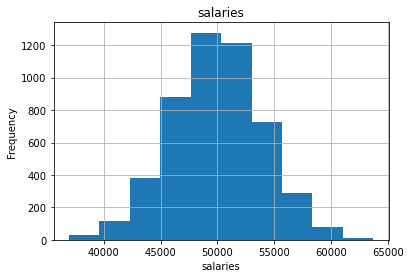

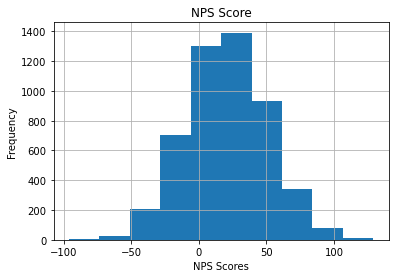

In [44]:
# plot for raw salaries and NPS Score data goes here
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df2.hist('salaries'), plt.xlabel('salaries'), plt.ylabel('Frequency')
df2.hist('NPS Score'), plt.xlabel('NPS Scores'), plt.ylabel('Frequency')

(array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E90DE53630>]],
       dtype=object), Text(0.5, 0, 'NPS Scores'), Text(0, 0.5, 'Frequency'))

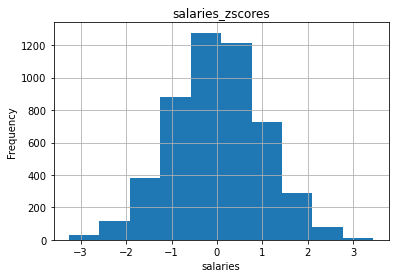

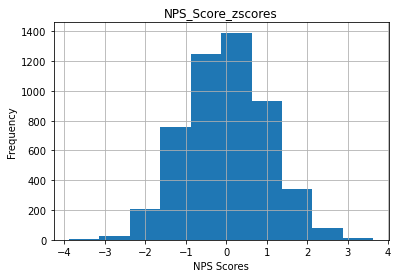

In [45]:
# plot for zscores for salaries and NPS Score data goes here
df2.hist('salaries_zscores'), plt.xlabel('salaries'), plt.ylabel('Frequency')
df2.hist('NPS_Score_zscores'), plt.xlabel('NPS Scores'), plt.ylabel('Frequency')

# Part 4 - PMF
using the column 'eventOutcomes'

create a PMF and plot the PMF as a bar chart

See image below for referenc

<img src="solutions/images/part4_pmf.png"/>

In [46]:
outcome_count = {}
for outcome in eventOutcome_array:
    outcome_count[outcome] = outcome_count.get(outcome, 0) + 1
outcome_count

{1: 608, 2: 592, 5: 591, 0: 624, 6: 622, 4: 666, 3: 636, 7: 661}

In [47]:
outcome_count_percents = {}
total_count = sum(outcome_count.values())
for outcome in outcome_count.keys():
    percentage = outcome_count[outcome]/total_count
    outcome_count_percents[outcome] = percentage

In [48]:
outcome_count_percents

{1: 0.1216,
 2: 0.1184,
 5: 0.1182,
 0: 0.1248,
 6: 0.1244,
 4: 0.1332,
 3: 0.1272,
 7: 0.1322}

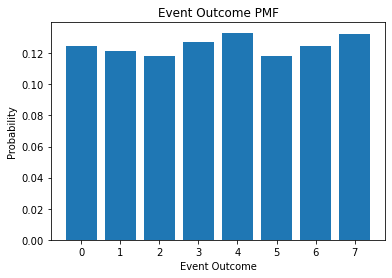

In [49]:
event_outcome = outcome_count_percents.keys()
percentages = outcome_count_percents.values()

plt.bar(event_outcome, percentages)
plt.title("Event Outcome PMF")
plt.xlabel('Event Outcome')
plt.ylabel('Probability')

plt.show()

# Part 5 - CDF
plot the CDF of Event Outcomes as a scatter plot using the information above

See image below for reference 

<img src="solutions/images/part5_cmf.png"/>

In [50]:
eventOutcome_array.mean()

3.5356

In [52]:
x = scs.norm.cdf(eventOutcome_array, 3.5356, 5 )
x

array([0.30603531, 0.37937602, 0.61519306, ..., 0.45734689, 0.75580757,
       0.23974595])

Text(0, 0.5, 'P(E<=N)')

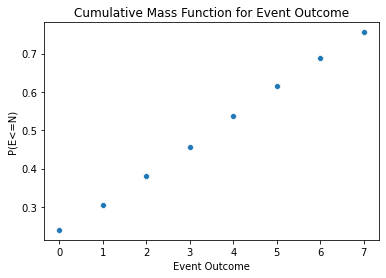

In [53]:
sns.scatterplot(eventOutcome_array, x)
plt.title("Cumulative Mass Function for Event Outcome")
plt.xlabel('Event Outcome')
plt.ylabel('P(E<=N)')

# Bonus:
* using np.where find salaries with zscores <= -2.0

* calculate the skewness and kurtosis for the NPS Score column

In [106]:
# find salaries with zscores <= 2.0 

In [107]:
# calculate skewness and kurtosis of NPS Score column

# run the cell below to convert your notebook to a README for assessment

In [54]:
!jupyter nbconvert --to markdown assessment.ipynb && mv assessment.md README.md

[NbConvertApp] Converting notebook assessment.ipynb to markdown
[NbConvertApp] Support files will be in assessment_files\
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Writing 20003 bytes to assessment.md
